In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# train test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1119, 12)
(480, 12)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
df_train[df.columns.tolist()] = scaler.fit_transform(df_train[df.columns.tolist()])
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
858,0.642202,0.109589,0.47,0.054795,0.070234,0.225352,0.091873,0.498532,0.322835,0.184049,0.392857,0.8
654,0.357798,0.239726,0.47,0.102740,0.103679,0.084507,0.081272,0.574890,0.267717,0.055215,0.196429,0.4
721,0.385321,0.246575,0.24,0.133562,0.137124,0.478873,0.353357,0.596916,0.283465,0.098160,0.142857,0.4
176,0.238532,0.178082,0.21,0.075342,0.113712,0.084507,0.102473,0.442731,0.464567,0.061350,0.196429,0.4
692,0.357798,0.253425,0.51,0.075342,0.685619,0.211268,0.197880,0.574890,0.228346,0.490798,0.107143,0.4


In [9]:
y = df_train.pop('quality')
X = df_train

In [10]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()
lm.fit(X, y)
rfe = RFE(lm, 7)
rfe = rfe.fit(X, y)

In [12]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', False, 3),
 ('volatile acidity', True, 1),
 ('citric acid', False, 4),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 5),
 ('total sulfur dioxide', True, 1),
 ('density', False, 2),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [13]:
col = X.columns[rfe.support_]
col

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
X.columns[~rfe.support_]

Index(['fixed acidity', 'citric acid', 'free sulfur dioxide', 'density'], dtype='object')

In [15]:
X_train_rfe = X[col]

In [16]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [17]:
lm = sm.OLS(y,X_train_rfe).fit()

In [18]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     95.56
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          3.85e-109
Time:                        22:51:49   Log-Likelihood:                 711.58
No. Observations:                1119   AIC:                            -1407.
Df Residuals:                    1111   BIC:                            -1367.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5448 

In [19]:
predictors = [predictor for predictor in col if predictor != 'residual sugar']
X_train_rfe = X[predictors]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     110.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          2.83e-109
Time:                        22:51:49   Log-Likelihood:                 709.46
No. Observations:                1119   AIC:                            -1405.
Df Residuals:                    1112   BIC:                            -1370.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5533 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,pH,11.23
0,volatile acidity,6.86
5,alcohol,5.02
4,sulphates,4.94
1,chlorides,4.34
2,total sulfur dioxide,2.47


In [21]:
#predictors = [predictor for predictor in col if predictor != 'pH']
X_train_rfe = X[predictors].drop(['pH'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     128.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          2.84e-107
Time:                        22:51:49   Log-Likelihood:                 702.29
No. Observations:                1119   AIC:                            -1393.
Df Residuals:                    1113   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5045 

In [22]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,sulphates,4.82
1,chlorides,4.34
0,volatile acidity,4.16
4,alcohol,3.41
2,total sulfur dioxide,2.40


In [23]:
y_pred_rfe = lm.predict(X_train_rfe)

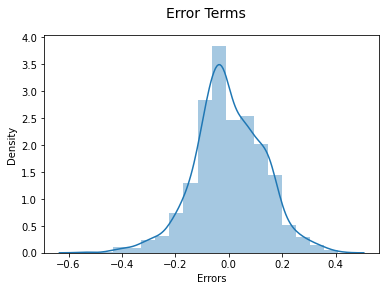

In [28]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred_rfe), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()